# Schrödinger Equation for Hydrogen

## Radial Solution
The Radial Solution

In [8]:
def radial_function(n, l, r, a0=1):
    """
    Calculate the radial part of hydrogen wavefunction R_nl(r)

    Parameters:
    n: principal quantum number
    l: orbital angular momentum quantum number
    r: radial distance (in units of Bohr radius)
    a0: Bohr radius (set to 1 for atomic units)
    """
    # Normalization constant
    rho = 2 * r / (n * a0)

    # Associated Laguerre polynomial
    laguerre = genlaguerre(n - l - 1, 2 * l + 1)

    # Radial wavefunction
    R_nl = np.sqrt((2/(n*a0))**3 * math.factorial(n-l-1) / (2*n*math.factorial(n+l))) * \
           np.exp(-rho/2) * (rho**l) * laguerre(rho)

    return R_nl

In [9]:
def radial_probability_density(n, l, r, a0=1):
    """
    Calculate radial probability density P(r) = r² * |R_nl(r)|²
    This gives the probability of finding electron in spherical shell at radius r
    """
    R_nl = radial_function(n, l, r, a0)
    return r**2 * np.abs(R_nl)**2

C:\Users\dagra\AppData\Local\Temp\ipykernel_20736\3866952756.py:44: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


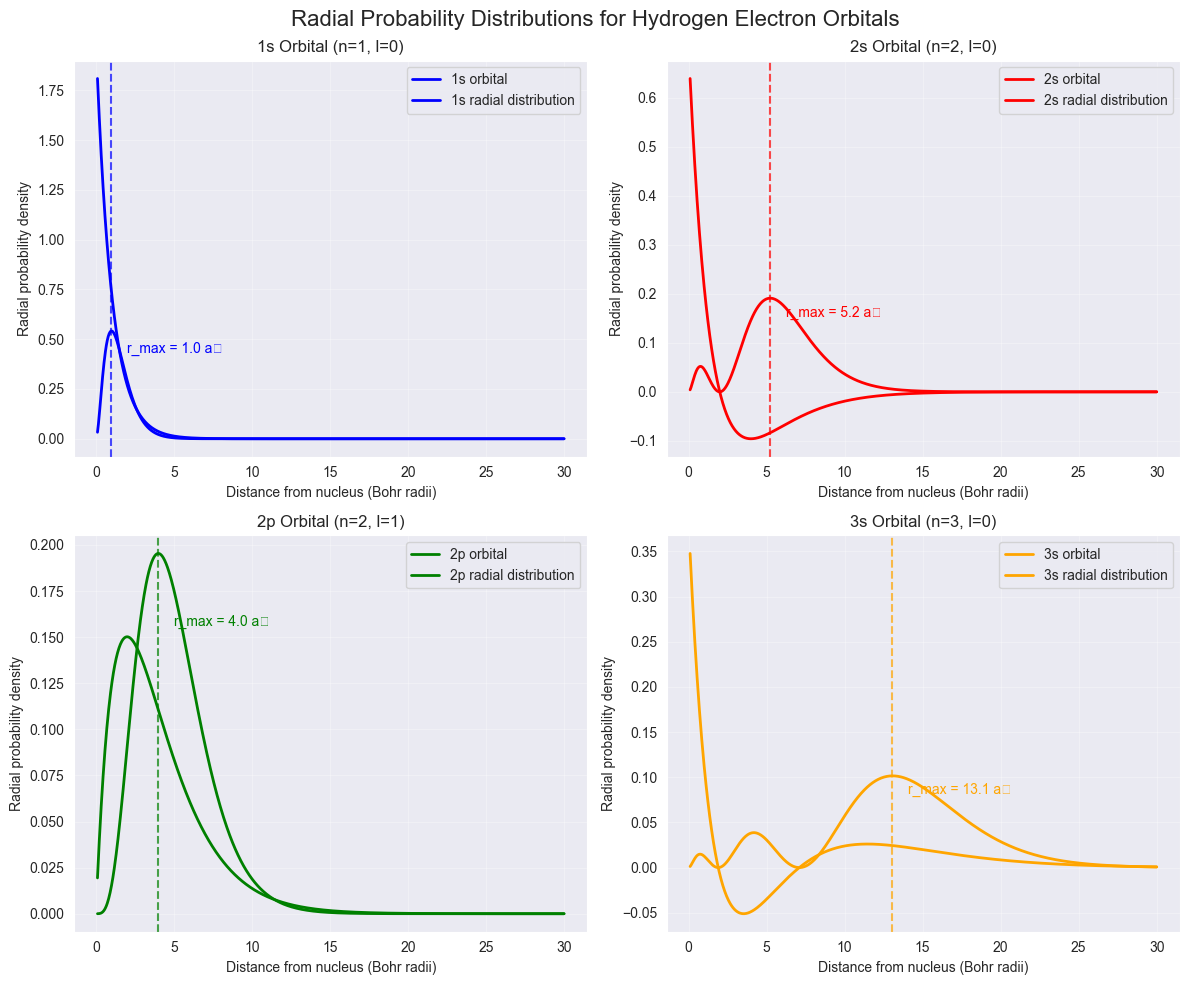

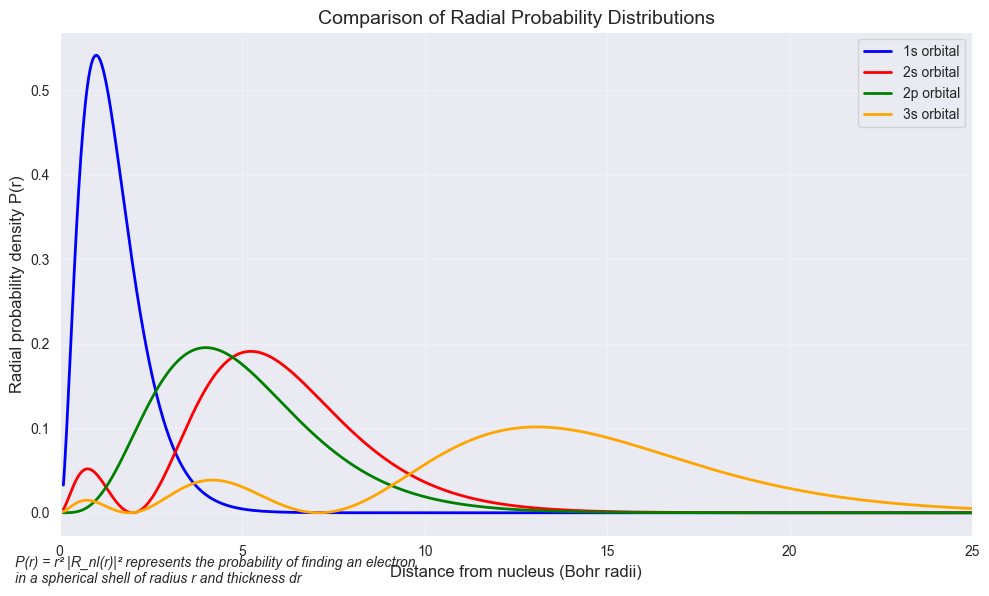

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
import math

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Radial Probability Distributions for Hydrogen Electron Orbitals', fontsize=16)

r = np.linspace(0.1, 30, 1000)

# Plot different quantum states
states = [
    (1, 0, '1s'),  # 1s orbital
    (2, 0, '2s'),  # 2s orbital
    (2, 1, '2p'),  # 2p orbital
    (3, 0, '3s')   # 3s orbital
]

colors = ['blue', 'red', 'green', 'orange']

for i, (n, l, label) in enumerate(states):
    row = i // 2
    col = i % 2

    prob_density = radial_probability_density(n, l, r)
    radial_fct = radial_function(n, l, r)

    axes[row, col].plot(r, prob_density, color=colors[i], linewidth=2, label=f'{label} orbital')
    axes[row, col].plot(r, radial_fct, color=colors[i], linewidth=2, label=f'{label} radial distribution')
    axes[row, col].set_xlabel('Distance from nucleus (Bohr radii)')
    axes[row, col].set_ylabel('Radial probability density')
    axes[row, col].set_title(f'{label} Orbital (n={n}, l={l})')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].legend()

    # Find and mark the most probable radius
    max_idx = np.argmax(prob_density)
    max_r = r[max_idx]
    max_prob = prob_density[max_idx]
    axes[row, col].axvline(x=max_r, color=colors[i], linestyle='--', alpha=0.7)
    axes[row, col].text(max_r + 1, max_prob * 0.8, f'r_max = {max_r:.1f} a₀',
                       fontsize=10, color=colors[i])

plt.tight_layout()
plt.show()

# Also create a comparison plot with multiple orbitals on same axes
plt.figure(figsize=(10, 6))

for i, (n, l, label) in enumerate(states):
    prob_density = radial_probability_density(n, l, r)
    plt.plot(r, prob_density, color=colors[i], linewidth=2, label=f'{label} orbital')

plt.xlabel('Distance from nucleus (Bohr radii)', fontsize=12)
plt.ylabel('Radial probability density P(r)', fontsize=12)
plt.title('Comparison of Radial Probability Distributions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 25)

# Add explanatory text
plt.figtext(0.02, 0.02,
           'P(r) = r² |R_nl(r)|² represents the probability of finding an electron\n'
           'in a spherical shell of radius r and thickness dr',
           fontsize=10, style='italic')

plt.tight_layout()
plt.show()